# **Credit Card Fraud Detection**
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

# Importing Packages

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Importing Data from the Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.head()) 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

*The column 'Time' does not contribute to any of the models. Thus, here we are dropping the column from the imported data.*

In [3]:
df.drop('Time', axis = 1, inplace = True)
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

# Analysis of the Dataset

### Case Counts

In [4]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNTS')
print('--------------------------------------------')
print('Total number of cases are ', cases)
print('Number of Non-fraud cases are ', nonfraud_count)
print('Number of Fraud cases are ', fraud_count)
print('Percentage of fraud cases is ', fraud_percentage, '%')
print('--------------------------------------------')


CASE COUNTS
--------------------------------------------
Total number of cases are  284807
Number of Non-fraud cases are  284315
Number of Fraud cases are  492
Percentage of fraud cases is  0.17 %
--------------------------------------------


### Correlation Matrix

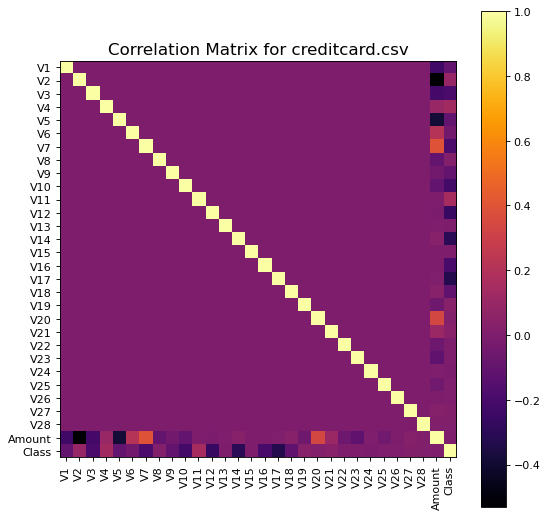

In [5]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1, cmap = plt.cm.inferno)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for creditcard.csv', fontsize=15)
    plt.show()
plotCorrelationMatrix(df, 8)

### Statistical View of the 'Amount' data

In [6]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('CASE AMOUNT STATISTICS')
print('--------------------------------------------')
print('NON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases.Amount.describe())
print('--------------------------------------------')
print('FRAUD CASE AMOUNT STATS')
print(fraud_cases.Amount.describe())
print('--------------------------------------------')


CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


# Data Splitting

In [7]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X_train samples : \n', X_train[:1])
print('X_test samples : \n', X_test[0:1])
print('y_train samples : \n', y_train[0:20])
print('y_test samples : \n', y_test[0:20])

X_train samples : 
 [[-1.11504743e+00  1.03558276e+00  8.00712441e-01 -1.06039825e+00
   3.26211690e-02  8.53422160e-01 -6.14243480e-01 -3.23116112e+00
   1.53994798e+00 -8.16908791e-01 -1.30559201e+00  1.08177199e-01
  -8.59609580e-01 -7.19342108e-02  9.06655628e-01 -1.72092961e+00
   7.97853221e-01 -6.75939779e-03  1.95677806e+00 -6.44895565e-01
   3.02038533e+00 -5.39617976e-01  3.31564886e-02 -7.74945766e-01
   1.05867812e-01 -4.30853482e-01  2.29736936e-01 -7.05913036e-02
   1.29500000e+01]]
X_test samples : 
 [[-3.23333572e-01  1.05745525e+00 -4.83411518e-02 -6.07204308e-01
   1.25982115e+00 -9.17607168e-02  1.15910150e+00 -1.24334606e-01
  -1.74639536e-01 -1.64440065e+00 -1.11886302e+00  2.02647310e-01
   1.14596495e+00 -1.80235956e+00 -2.47177932e-01 -6.09453515e-02
   8.46605738e-01  3.79454387e-01  8.47262245e-01  1.86409421e-01
  -2.07098267e-01 -4.33890272e-01 -2.61613283e-01 -4.66506063e-02
   2.11512300e-01  8.29721214e-03  1.08494430e-01  1.61139167e-01
   4.00000000e+01

# Standardization of 'Amount' Data
The data in the 'Amount' column is hugely varying.
Therefore, here the 'Amount' column is being standardized by removing the mean and scaling to unit variance.
The standardized value of a sample from the data **`x`** is calculated as:   **`z = (x - u) / sd`**
where **`u`** is the mean of the given data and **`sd`** is the standard deviation of the given data.

In [8]:
sc = StandardScaler()
train_amount = X_train[:, -1]
test_amount = X_test[:, -1]

#print(train_amount.reshape(-1, 1))

X_train[:, -1] = (sc.fit_transform(train_amount.reshape(-1, 1))).reshape(-1)
X_test[:, -1] = (sc.transform(test_amount.reshape(-1, 1))).reshape(-1)

print('X_train Amount:\n', X_train[:, -1])
print('X_test Amount:\n', X_test[:, -1])

X_train Amount:
 [-0.30511629 -0.25423683 -0.32950779 ... -0.21662151  0.33333622
 -0.29286006]
X_test Amount:
 [-0.19606009 -0.34934352  0.02971246 ...  1.99397392 -0.34543281
 -0.2968514 ]


# Implementation of the Models

### KNN Classifier Implementation

In [9]:
k = 5 #must be odd value
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

### Logistic Regression Implementation

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

### SVM Implementation

In [11]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

### Decision Tree

In [12]:
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(X_train, y_train)
dt_yhat = dt.predict(X_test)

### Random Forest

In [13]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

### Naive Bayes

In [14]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train, y_train)
nb_yhat = nb.predict(X_test)

# Evaluation

### Accuracy Score 
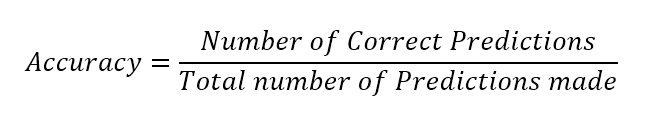

In [15]:
print('ACCURACY SCORE')
print('------------------------------------------------------------------------')
print('Accuracy score of the KNN model is', accuracy_score(y_test, knn_yhat))
print('------------------------------------------------------------------------')
print('Accuracy score of the Logistic Regression model is', accuracy_score(y_test, lr_yhat))
print('------------------------------------------------------------------------')
print('Accuracy score of the SVM model is', accuracy_score(y_test, svm_yhat))
print('------------------------------------------------------------------------')
print('Accuracy score of the Decision Tree model is', accuracy_score(y_test, dt_yhat))
print('------------------------------------------------------------------------')
print('Accuracy score of the Random Forest model is', accuracy_score(y_test, rf_yhat))
print('------------------------------------------------------------------------')
print('Accuracy score of the Naive Bayes model is', accuracy_score(y_test, nb_yhat))
print('------------------------------------------------------------------------')

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995259997893332
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the Random Forest model is 0.9992977774656788
------------------------------------------------------------------------
Accuracy score of the Naive Bayes model is 0.9991397773954567
------------------------------------------------------------------------


### F1 Score
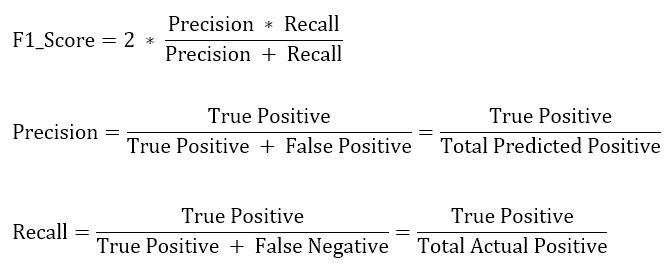

In [16]:
print('F1 SCORE')
print('------------------------------------------------------------------------')
print('F1 score of the KNN model is', f1_score(y_test, knn_yhat))
print('------------------------------------------------------------------------')
print('F1 score of the Logistic Regression model is', f1_score(y_test, lr_yhat))
print('------------------------------------------------------------------------')
print('F1 score of the SVM model is', f1_score(y_test, svm_yhat))
print('------------------------------------------------------------------------')
print('F1 score of the Decision Tree model is', f1_score(y_test, dt_yhat))
print('------------------------------------------------------------------------')
print('F1 score of the Random Forest model is', f1_score(y_test, rf_yhat))
print('------------------------------------------------------------------------')
print('F1 score of the Naive Bayes model is', f1_score(y_test, nb_yhat))
print('------------------------------------------------------------------------')

F1 SCORE
------------------------------------------------------------------------
F1 score of the KNN model is 0.8571428571428572
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the SVM model is 0.7771428571428572
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the Random Forest model is 0.7727272727272727
------------------------------------------------------------------------
F1 score of the Naive Bayes model is 0.7292817679558012
------------------------------------------------------------------------


### Confusion Matrix

In [17]:
# defining the plot function
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Pastel1_r):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'black' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### KNN Confusion Matrix

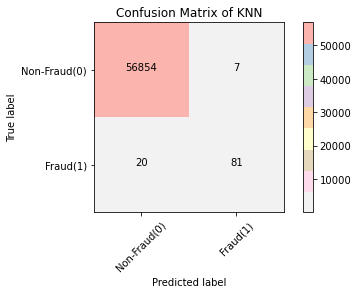

In [18]:
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

#### Logistic Regression Confusion Matrix

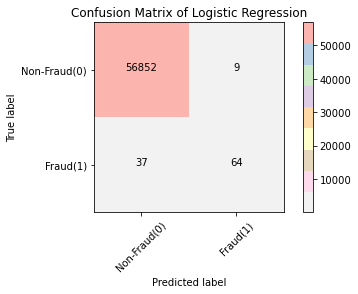

In [19]:
#Logistic Regression
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

#### SVM Confusion Matrix

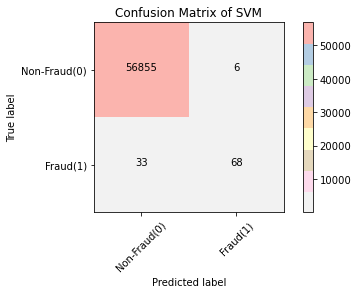

In [20]:
#SVM
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

#### Decision Tree Confusion Matrix

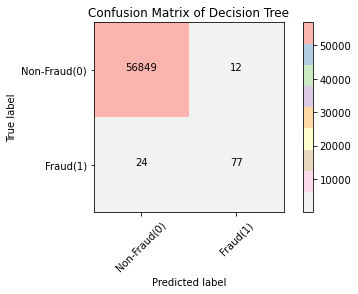

In [21]:
#Decision Tree
dt_matrix = confusion_matrix(y_test, dt_yhat, labels = [0, 1])
dt_cm_plot = plot_confusion_matrix(dt_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('dt_cm_plot.png')
plt.show()

#### Random Forest Confusion Matrix

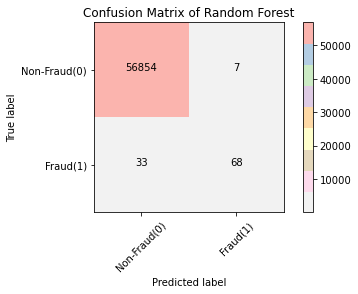

In [22]:
#Random Forest
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Random Forest')
plt.savefig('rf_cm_plot.png')
plt.show()

#### Naive Bayes Confusion Matrix

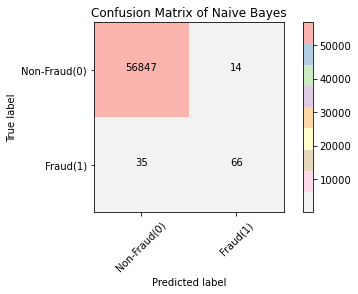

In [23]:
#Naive Bayes
nb_matrix = confusion_matrix(y_test, nb_yhat, labels = [0, 1])
nb_cm_plot = plot_confusion_matrix(nb_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Naive Bayes')
plt.savefig('nb_cm_plot.png')
plt.show()

## AUC-ROC Score

In [24]:
print('AUC - ROC SCORE')
print('------------------------------------------------------------------------')
print('AUC - ROC score of the KNN model is', roc_auc_score(y_test, knn_yhat))
print('------------------------------------------------------------------------')
print('AUC - ROC score of the Logistic Regression model is', roc_auc_score(y_test, lr_yhat))
print('------------------------------------------------------------------------')
print('AUC - ROC score of the SVM model is', roc_auc_score(y_test, svm_yhat))
print('------------------------------------------------------------------------')
print('AUC - ROC score of the Decision Tree model is', roc_auc_score(y_test, dt_yhat))
print('------------------------------------------------------------------------')
print('AUC - ROC score of the Random Forest model is', roc_auc_score(y_test, rf_yhat))
print('------------------------------------------------------------------------')
print('AUC - ROC score of the Naive Bayes model is', roc_auc_score(y_test, nb_yhat))
print('------------------------------------------------------------------------')

AUC - ROC SCORE
------------------------------------------------------------------------
AUC - ROC score of the KNN model is 0.9009285453967039
------------------------------------------------------------------------
AUC - ROC score of the Logistic Regression model is 0.8167525428084921
------------------------------------------------------------------------
AUC - ROC score of the SVM model is 0.8365809031264535
------------------------------------------------------------------------
AUC - ROC score of the Decision Tree model is 0.8810825983321147
------------------------------------------------------------------------
AUC - ROC score of the Random Forest model is 0.8365721097531396
------------------------------------------------------------------------
AUC - ROC score of the Naive Bayes model is 0.8266095660409326
------------------------------------------------------------------------


## ROC Curve

In [25]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

###KNN ROC Curve

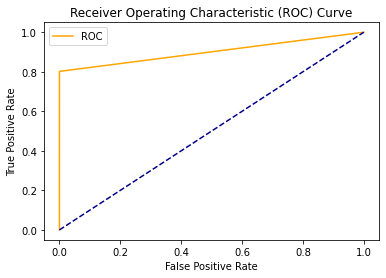

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, knn_yhat)
plot_roc_curve(fpr, tpr)

### Logistic Regression ROC Curve

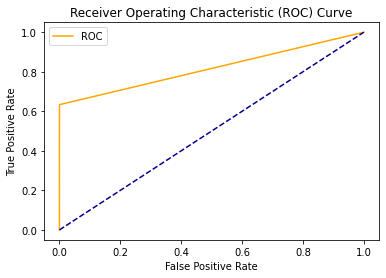

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, lr_yhat)
plot_roc_curve(fpr, tpr)

### SVM ROC Curve

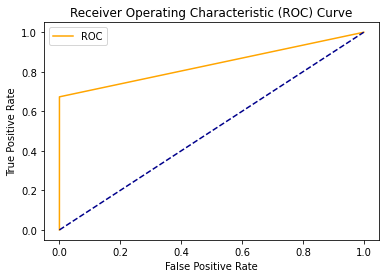

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, svm_yhat)
plot_roc_curve(fpr, tpr)

### Decision Tree ROC Curve

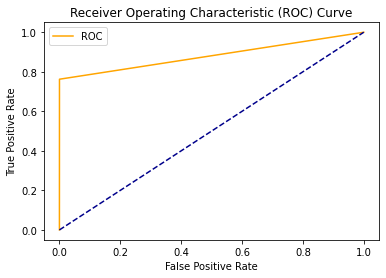

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, dt_yhat)
plot_roc_curve(fpr, tpr)

### Random Forest ROC Curve

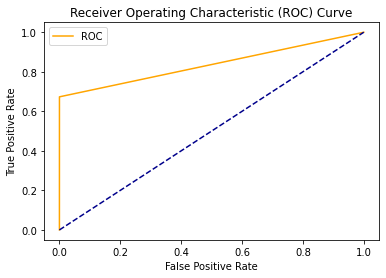

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, rf_yhat)
plot_roc_curve(fpr, tpr)

### Naive Bayes ROC Curve

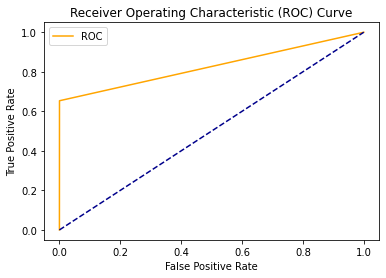

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, nb_yhat)
plot_roc_curve(fpr, tpr)